In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage.interpolation import rotate



# Naive one dimensional case
with noise

In [2]:
num_pixels_x = 100
a_x = np.linspace(-np.pi/2, np.pi/2, num_pixels_x)

In [3]:
accel = 1
v1 = 3
d1 = 3
dt = 0.05

In [4]:
v2 = v1 + accel*dt
d2 = d1 + v2*dt

In [5]:
noise = 0.02

alphadot1_x = v1/d1*(np.sin(a_x)*np.cos(a_x)) + np.random.normal(0, noise, a_x.shape)
alphadot2_x = v2/d2*(np.sin(a_x)*np.cos(a_x)) + np.random.normal(0, noise, a_x.shape)

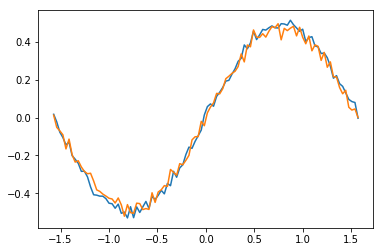

In [6]:
plt.plot(a_x, alphadot1_x)
plt.plot(a_x, alphadot2_x)

In [7]:
r1 = alphadot1_x / (np.sin(a_x)*np.cos(a_x))
r2 = alphadot2_x / (np.sin(a_x)*np.cos(a_x))

In [8]:
rdot = (r2-r1) / dt

In [9]:
r = np.mean([r1, r2], axis=0)
v_over_a_x = r / (r**2 + rdot)

In [10]:
print('vel / accel = ', np.mean(v_over_a_x))
print('vel / accel = ', np.median(v_over_a_x))
print('should be: ', np.mean([v1, v2]))

vel / accel =  -1.5787220809994034
vel / accel =  0.11301660431165658
should be:  3.025


# Mean
Doesn't work
Take the mean of r before calculating the derivative

In [11]:
r1 = np.mean(alphadot1_x / (np.sin(a_x)*np.cos(a_x)))
r2 = np.mean(alphadot2_x / (np.sin(a_x)*np.cos(a_x)))

In [12]:
rdot = (r2-r1) / dt

In [13]:
r = np.mean([r1, r2], axis=0)
v_over_a_x = r / (r**2 + rdot)

In [14]:
print('vel / accel = ', v_over_a_x)
print('should be: ', np.mean([v1, v2]))

vel / accel =  -3.6996036207244115e-13
should be:  3.025


# Median
Works much better
Take the mean of r before calculating the derivative

In [15]:
r1 = np.median(alphadot1_x / (np.sin(a_x)*np.cos(a_x)))
r2 = np.median(alphadot2_x / (np.sin(a_x)*np.cos(a_x)))

In [16]:
rdot = (r2-r1) / dt

In [17]:
r = np.mean([r1, r2], axis=0)
v_over_a_x = r / (r**2 + rdot)

In [18]:
print('vel / accel = ', v_over_a_x)
print('should be: ', np.mean([v1, v2]))

vel / accel =  4.906088692613301
should be:  3.025


# Now in 2D

In [73]:
num_pixels_x = 60
num_pixels_y = 40

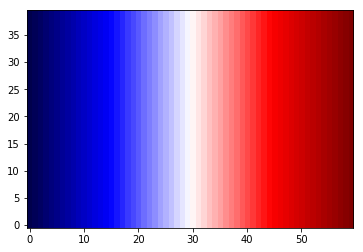

In [74]:
a_x = np.vstack([np.linspace(-np.pi/2, np.pi/2, num_pixels_x)]*num_pixels_y)
plt.imshow(a_x, cmap='seismic', origin='lower')

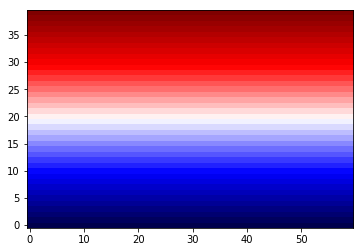

In [75]:
a_y = np.vstack([np.linspace(-np.pi/2, np.pi/2, num_pixels_y)]*num_pixels_x).T
plt.imshow(a_y, cmap='seismic', origin='lower')

In [76]:
noise = 0.05

In [77]:
alphadot1_x = v1/d1*(np.sin(a_x)*np.cos(a_x)) + np.random.normal(0, noise, a_x.shape)
alphadot1_y = v1/d1*(np.sin(a_y)*np.cos(a_y)) + np.random.normal(0, noise, a_x.shape)

In [78]:
alphadot2_x = v2/d2*(np.sin(a_x)*np.cos(a_x)) + np.random.normal(0, noise, a_x.shape)
alphadot2_y = v2/d2*(np.sin(a_y)*np.cos(a_y)) + np.random.normal(0, noise, a_x.shape)

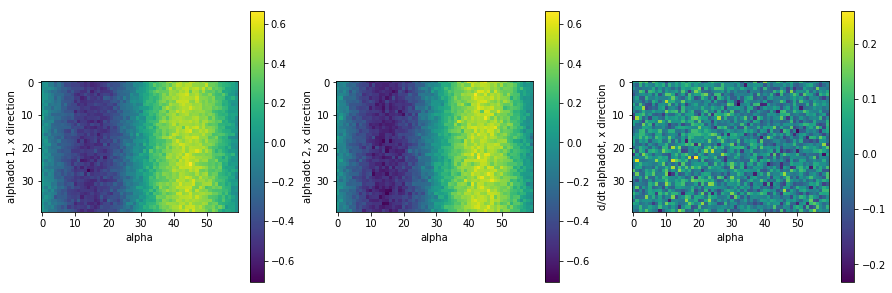

In [79]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,3,1)
a1 = ax.imshow(alphadot1_x)
ax.set_xlabel('alpha')
ax.set_ylabel('alphadot 1, x direction')
fig.colorbar(a1, ax=ax)

ax = fig.add_subplot(1,3,2)
a2 = ax.imshow(alphadot2_x)
ax.set_xlabel('alpha')
ax.set_ylabel('alphadot 2, x direction')
fig.colorbar(a1, ax=ax)

ax = fig.add_subplot(1,3,3)
a3 = ax.imshow(alphadot2_x - alphadot1_x)
ax.set_xlabel('alpha')
ax.set_ylabel('d/dt alphadot, x direction')
fig.colorbar(a3, ax=ax)

# Along the horizontal

In [80]:
midx = int(a_x.shape[0]/2)
alphadot1_x0 = alphadot1_x[midx, :]
alphadot2_x0 = alphadot2_x[midx, :]

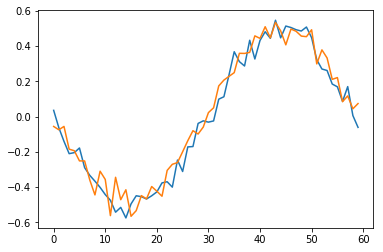

In [81]:
plt.plot(alphadot1_x0)
plt.plot(alphadot2_x0)

In [82]:
r1 = np.nanmedian(alphadot1_x0 / (np.sin(a_x[0,:])*np.cos(a_x[0,:])))
r2 = np.nanmedian(alphadot2_x0 / (np.sin(a_x[0,:])*np.cos(a_x[0,:])))

In [83]:
rdot = (r2-r1) / dt

In [84]:
r = np.mean([r1, r2], axis=0)
v_over_a_x = r / (r**2 + rdot)

In [85]:
print('vel / accel = ', v_over_a_x)
print('should be: ', np.mean([v1, v2]))

vel / accel =  0.8593756556289153
should be:  3.025


# Along the vertical

In [86]:
midy = int(a_x.shape[1]/2)
alphadot1_y0 = alphadot1_y[:, midy]
alphadot2_y0 = alphadot2_y[:, midy]

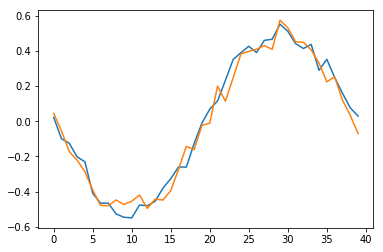

In [87]:
plt.plot(alphadot1_y0)
plt.plot(alphadot2_y0)

In [88]:
r1 = np.nanmedian(alphadot1_y0 / (np.sin(a_y[:,0])*np.cos(a_y[:,0])))
r2 = np.nanmedian(alphadot2_y0 / (np.sin(a_y[:,0])*np.cos(a_y[:,0])))

In [89]:
rdot = (r2-r1) / dt

In [90]:
r = np.mean([r1, r2], axis=0)
v_over_a_x = r / (r**2 + rdot)

In [91]:
print('vel / accel = ', v_over_a_x)
print('should be: ', np.mean([v1, v2]))

vel / accel =  -1.8407120344357428
should be:  3.025


# Now generalize.. along any line that goes through the center of expansion

In [92]:
def get_alphadot_transect(angle, a_x, a_y, alphadot_x, alphadot_y): # angle in degrees
    rotated_alphadot_x = rotate(alphadot_x, angle=angle)
    rotated_a_x = rotate(a_x, angle=angle)
    
    r1 = np.median(alphadot1_x0[0, :] / (np.sin(a_x[0,:])*np.cos(a_x[0,:])))
    r2 = np.median(alphadot2_x0[0, :] / (np.sin(a_x[0,:])*np.cos(a_x[0,:])))

In [93]:
def get_rx_for_transect_at_angle(angle, a_x, alphadot_x):
    rotated_alphadot_x = rotate(alphadot_x, angle=angle, cval=np.nan)
    rotated_a_x = rotate(a_x, angle=angle, cval=np.nan)

    midx = int(rotated_a_x.shape[0]/2)

    rx = np.nanmedian(rotated_alphadot_x[midx, :] / (np.sin(rotated_a_x[midx,:])*np.cos(rotated_a_x[midx,:])))
    
    return rx


def get_ry_for_transect_at_angle(angle, a_y, alphadot_y):
    rotated_alphadot_y = rotate(alphadot_y, angle=angle, cval=np.nan)
    rotated_a_y = rotate(a_y, angle=angle, cval=np.nan)

    midy = int(rotated_a_y.shape[1]/2)

    ry = np.nanmedian(rotated_alphadot_y[midy, :] / (np.sin(rotated_a_y[midy, :])*np.cos(rotated_a_y[midy, :])))
    
    return ry

In [94]:
def get_v_over_a_for_angle(angle, a_x, a_y, alphadot1_x, alphadot2_x, alphadot1_y, alphadot2_y):
    r1x = get_rx_for_transect_at_angle(angle, a_x, alphadot1_x)
    r2x = get_rx_for_transect_at_angle(angle, a_x, alphadot2_x)

    r1y = get_rx_for_transect_at_angle(angle, a_y, alphadot1_y)
    r2y = get_rx_for_transect_at_angle(angle, a_y, alphadot2_y)

    rdotx = (r2x-r1x) / dt
    rdoty = (r2y-r1y) / dt

    rx = np.mean([r1x, r2x], axis=0)
    v_over_a_x = rx / (rx**2 + rdotx)

    ry = np.mean([r1y, r2y], axis=0)
    v_over_a_y = ry / (ry**2 + rdoty)

    return np.max([v_over_a_x, v_over_a_y])

In [95]:
values = []
angles = np.linspace(0, 360, 50).astype(float)

for angle in angles:
    values.append(get_v_over_a_for_angle(angle, a_x, a_y, alphadot1_x, alphadot2_x, alphadot1_y, alphadot2_y))

In [96]:
np.median(values)

1.533172748274854